# Melodie's extreme bar chart tutorial, useful for LCAs

If you liked the graphs found in the following papers, and you want to make some crazy bar graphs, this is the place to go! Here, we will cover making a bar graph, a stacked bar graph, and the highly covetted stacked clustered bar graph. Furthermore, all of those can have error bars of your chosing!! And we'll also go over stuff like line breaks, color gradients, etc.

Headings are presenting in the following order, you can search for them to speed through the tutorial
- Simple bar chart (coloring included)
- Error Bars!
- Inset Graph
- Stacked bar chart (error bars, and color gradient at the end)
- Sharing an Axis
- Second axis/scatter plot
- Clustered barchar (fixed legend and color gradient at the end)
- Adding a linebreak
- The Stacked clustered bar chart
- Adding two legends
- The Stacked clustered bar chart with error bars (and gradient coloring)

Figures from the following papers covered in this tutorial:

Carbon footprint of Li-Oxygen batteries and the impact of material and structure selection - (https://doi.org/10.1016/j.est.2023.106684)

Applying Life Cycle Analysis for Materials Selection in Li-O2 Batteries - (in Progress)

## Import modules

I'm going to import my modules as you need them. Right now we're just starting with these two. We'll use more later :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

## Make a simple bar chart

Text(0, 0.5, 'y label')

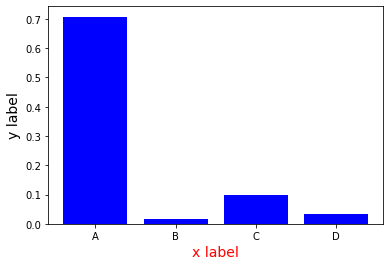

In [2]:
#Right now we're going to make a simple bar chart. You can do this with just two arrays, I'll make some data!

titles = ["A", "B", "C", "D"]
values = np.random.rand(4)

#In this step, I'm creating a subplot. 
#For a graph this simple, a subplot is not needed but it sets up good infrastructure for what's to come
fig, ax = plt.subplots()
plt.bar(titles, values, color=['blue'])

#There are several ways to interact with changing features of the graph.
#For example, I can use this ax. command
ax.set_xlabel("x label", fontsize = 14, color = 'red')
ax.set_ylabel("y label", fontsize = 14)
#Or I can use:
# plt.xlabel("x label", fontsize = 14)
# plt.ylabel("x label", fontsize = 14, color='red')

#I usually prefer to use the ax method, because as we move on into plotting subplots, plt. is more difficult to control

This is a great place to start, but there's a lot of stuff you can do with your plot now that you have it. The first thing you can do is make your graph more fun. Here we can set the size and rotation of the labels. We can also remove ticks, or change their orientation and color!

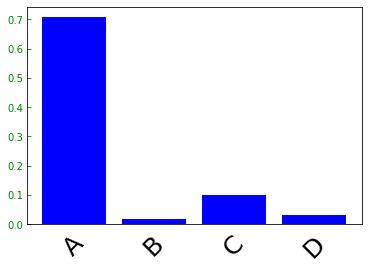

In [3]:
fig, ax = plt.subplots()
plt.bar(titles, values, color=['blue'])

labels = ax.get_xticklabels()
for label in labels:
    label.set_rotation(45)
    label.set_size(25)
    
ax.tick_params(axis="y",direction="in", colors='green')
ax.xaxis.set_ticks_position('none') 

So let's move on to color. All graphics should be visually appealing. First, you can spice things up by using the python default colors.

<BarContainer object of 4 artists>

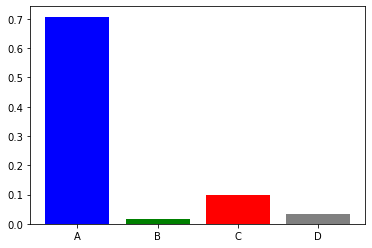

In [4]:
plt.bar(titles, values, color=['blue', 'green','red','grey'])

Cool, but you can also just make it whatever you want. I'm a huge fan of pastels and bring graphs! This is great

<BarContainer object of 4 artists>

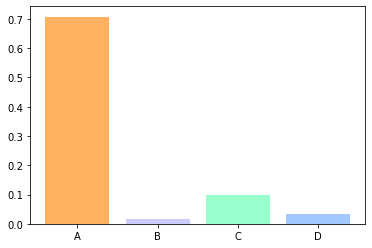

In [5]:
colors = ['#FFB061','#CCCCFF','#99FFCC','#A3C8FF']
plt.bar(titles, values, color=colors)

Alright, finally, it's a lot of work to select a bunch of colors, so we can just use cmap to generate a color for us.
Take a look at your color palettes here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<BarContainer object of 4 artists>

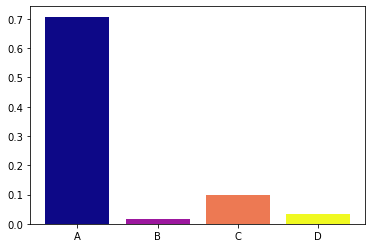

In [6]:
cmap = plt.get_cmap('plasma')
n_colors = len(values) 
color_ind = np.linspace(0,1,n_colors)
colors = list()
for i in np.arange(n_colors):
    colors.append(cmap(color_ind[i]))

plt.bar(titles, values, color=colors)

## Error Bars! 

<ErrorbarContainer object of 3 artists>

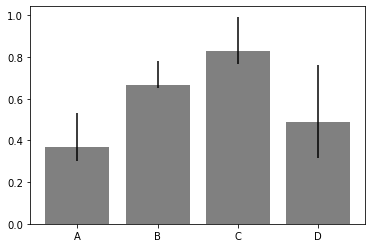

In [7]:
#generate values and errorbars, here, I've made the upper and lower error bars different, just to show they can be. 
#Error bars should be the value of the error! The maximum height of the error bar (i.e. values + error)
values = np.random.rand(4)
error = np.random.rand(4)*0.2
lower = error
upper = error+0.1

fig, ax = plt.subplots()
plt.bar(titles, values, color=['grey'])

#Add the error using the axis
ax.errorbar(titles, values, yerr = (lower,upper), color="black", ls='none')

## An Inset Graph

Remember how we started with making subplots? Well, that's exactly how you're going to make your graph inset. Now, we can see the different between using plt. vs ax. Plt. simply acts on the last graph interacted with, so I prefer to specify which graph I'm interacting with, using commands involving ax. 

Text(0, 0.5, 'y label')

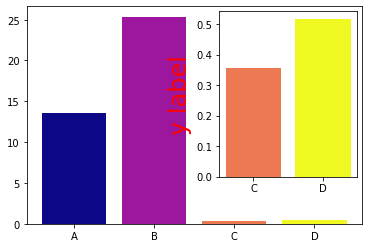

In [8]:
#You're going to import inset_axes 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Set up the data needed to create your graph
titles = ["A", "B", "C", "D"]
tall_values = np.random.rand(2)*20+10
short_values = np.random.rand(2)
values = np.concatenate((tall_values, short_values), axis = None)

#create your graph with
fig_inset, ax_inset = plt.subplots()
plt.bar(titles, values, color=colors)
a_tiny = inset_axes(ax_inset, width="41%", height="76%", loc="upper right")
location = len(tall_values)
plt.bar(titles[location:], short_values, color=colors[location:])

plt.ylabel("y label", fontsize = 24, color='red')

## The Stacked Bar Graph

Hard sell on whether or not to include the stacked bar graph or clustered bar graph first. I think the stacked bar graph might be a good place to start, just because bulk error bars are easier to do for this.

Now, I'm going to start working with dataframes instead of arrays! You can make stacked bar charts very easily from excel workbooks using df. I'll generate my own here, but I'll leave some code that gives you a hint on how to import data from a workbook.

Why would you use read_excel? Because you can do a for loop through dataframes!! That will come in handy later, during the clustered bar chart, maybe.

In [9]:
#Let's import Pandas! Pandas is my favorite python module!
import pandas as pd

#data = pd.read_csv('a_graph.csv', header=0)
#data = pd.read_excel("a_graph.xlsx", sheet_name= None, header= 0)

#I'll make a temp data set here. The data in this case will be organized differently.
# here, we have categories that are attributes of the title.
titles = ["A", "B", "C", "D", "E"]
categories =["Cats", "Bears", "Snorlax", "Armadillos"] 

data = pd.DataFrame(np.random.randint(0,100,size=(len(titles), len(categories))), columns=categories, index = titles) 
print(data)

   Cats  Bears  Snorlax  Armadillos
A    89     31       10          56
B    36     36        4          24
C    83     39       26          72
D    27     56        6          97
E    75     27       28          89


<AxesSubplot:>

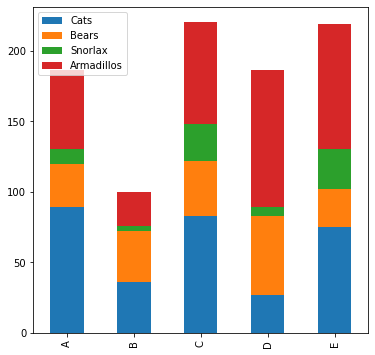

In [10]:
fig_stacked, a_stacked = plt.subplots()
data.plot(ax = a_stacked, kind='bar', stacked = True, figsize = (6,6))

Hmm Okay, what about error bars and changing the color?

<ErrorbarContainer object of 3 artists>

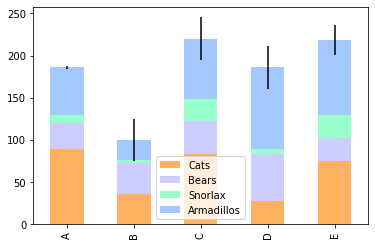

In [11]:
error = np.random.rand(len(titles))*30

#Here, I change the colors of the bar graph. If you add colors, you will be specifying the color of the categories.
colors = ['#FFB061','#CCCCFF','#99FFCC','#A3C8FF', '#B3DE69']

fig_stacked, a_stacked = plt.subplots()
data.plot(ax = a_stacked, kind='bar', stacked = True, color =colors)

total = data.sum(axis=1) 

a_stacked.errorbar(titles,total, yerr = (error,error), color="black", ls='none')

As always, I like to play with more colors. In this case, I would like to show you are really fun stacked bar graph that I did, where I made each category a gradient.

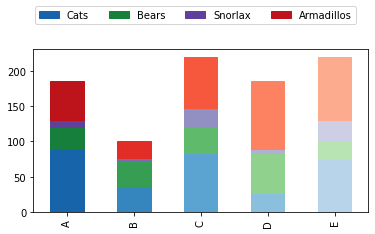

In [12]:
fig_colors, ax_colors = plt.subplots()
data.plot(ax = ax_colors, kind='bar', stacked = True, figsize = (6,3), legend = False)

cmap_themes = ['Blues','Greens','Purples','Reds']

legend_bar =len(titles)
colorseed_bar = []
color_ind = np.linspace(0.3,0.8,legend_bar)
color_ind = np.flip(color_ind)

#using this for loop, we are creating a list of colors that 
#will correspond to the order of colors in ax_colors.get_children below
# In future graphs where we use gradiented colors, I will use a different for loop
for color in cmap_themes:
    for i in np.arange(legend_bar):
        cmap = plt.get_cmap(color)
        colorseed_bar.append(cmap(color_ind[i]))

color_arrangement = len(colorseed_bar)

# Using ax_colors.get_children(), reads from left to right, from bottom to top. 
for x in np.arange(color_arrangement) :
    ax_colors.get_children()[x].set_color(colorseed_bar[x])

fig_colors.legend(loc='upper center', ncol = 4, bbox_to_anchor=(0.5, 1.10))

## Sharing an Axis

So you want to save space by sharing an axis, no problem. In this case, I'm doing the x-axis. I've also included a lot of style choices here. Feel free to toggle things on and off to see what you like

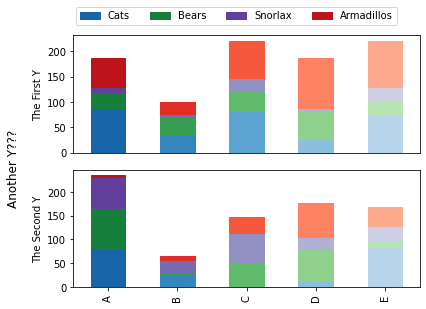

In [13]:
#Let's generate another set of data to use on the other axis

data_compare = pd.DataFrame(np.random.randint(0,100,size=(len(titles), len(categories))), columns=categories, index = titles)

#Now, we set up the plot to share the x-axis (sharex), you can also use (plt.subplots(1,2), sharey=True) 
fig_share, (ax_share1, ax_share2) = plt.subplots(2,1, sharex= True)
#we can specifcy which plot we want using the different ax

data.plot(ax = ax_share1, kind='bar', stacked = True, legend = False, ylabel = "The First Y")
data_compare.plot(ax = ax_share2, kind='bar', stacked = True, legend = False,  ylabel = "The Second Y")

#because we have two plots here maybe we want an overarching title for the Y axis. 
fig_share.supylabel('Another Y???')

# This makes our two y-axis not overlap!
plt.tight_layout()

#loading in the nice color scheme I made previously. You can get comment these lines out if you want to use another color scheme
for x in np.arange(color_arrangement) :
    ax_share1.get_children()[x].set_color(colorseed_bar[x])
    ax_share2.get_children()[x].set_color(colorseed_bar[x])

#I don't really like the tick marks for bar graphs
ax_share1.xaxis.set_ticks_position('none') 

#because we have two sets of data, we need to specify which parts of the dataset we want to make the legend.
#we can use the information from just one of the plots to make our legend more simple.
handles, labels = ax_share1.get_legend_handles_labels()

# make a legend that is not on either graph!
fig_share.legend(handles, labels, loc='upper center', ncol = 4, bbox_to_anchor=(0.55, 1.08))

## Ploting a Second Axis (with a scatter plot!!)

Perhaps you want to plot a line plot with a bar graph, and you'll need a secondarly axis. Below is a template, the data is of course nonsense, but perhaps you're trying to demonstrate a correlation  between two things and one of them needs to be split into a bar graph and a scatter plot or line. In this case, each group has one of each animal in it, depending on the randomness, we might see that a cat from group A is heavier than a cat from group B and that group B eats less. Amazing results!

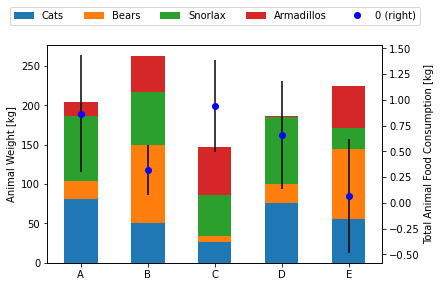

In [14]:
#Let's generate some new data
# In this graph, I'm flipping the titles and categories

titles = ["A", "B", "C", "D", "E"]
categories = ["Cats", "Bears", "Snorlax", "Armadillos"] 
data_bar = pd.DataFrame(np.random.randint(0,100,size=(len(titles), len(categories))), columns=categories, index = titles)
data_line = pd.DataFrame(np.random.rand(len(titles)), index = titles)

#create the plot, then add a secondary axis
fig3, ax_bar = plt.subplots()

#There's an empty plot if you don't have this. Don't ask me why. I don't know anything about python
plt.close()
ax_line = ax_bar.twinx()

ax_bar = data_bar.plot(kind="bar", stacked = True, legend=False)
ax_bar.set_ylabel("Animal Weight [kg]")

#Right now, I have made this a scatter plot. You can change it two a line by changing the linestyle
ax_line = data_line.plot(kind ="line", ax= ax_bar, secondary_y=True, legend=False,  linestyle = 'none', marker ='o', color = 'b')
ax_line.set_ylabel("Total Animal Food Consumption [kg]")

#We can, as always add error bars, to either axis. Here, I've added it to the secondary y-axis.
error = np.random.rand(len(titles))*0.4+0.2
ax_line.errorbar(titles, data_line[0], yerr = (error,error), color="black", ls='none')

handles_bar, labels_bar = ax_bar.get_legend_handles_labels()
handles_line, labels_line = ax_line.get_legend_handles_labels()

plt.legend(handles_bar+ handles_line, labels_bar+labels_line, loc='upper center', ncol = 5, bbox_to_anchor=(0.5, 1.2))


## The Clustered Bar Chart

Moving on, let's get to another exciting bar chart, the clustered bar chart.

In [15]:
#The data structure will need to be structured a little differently. For a clustered barchart, we want three things

#1) We want the bars themselves, previously, this has been animals, so let's pull those up again
Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 

#2)When we make our titles, we will need to have an "index", that will be the basis for our grouping.
Group = ["A", "B", "C", "D", "E"]

#3) Then we want the actual data, so I'll make another random array

data_clustered = pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals)
data_clustered['Group'] = Group

#So if you look at the array below, if you're importing a CSV/xcel workbook, this is what your data should take the form of
#Note, the position of the 'Weekdays column shouldn't matter
print(data_clustered)


   Cats  Bears  Snorlax  Armadillos Group
0    94     91       64          19     A
1    97     29       79          54     B
2    62     16       28           7     C
3    69     98       55          65     D
4    65      0       54          96     E


Right off the bat, we notice a few things with the chart below. First, the axis labels aren't left to write in the order that they should be. Second, the colors are the default colors, and I don't really like them.

Text(0, 0.5, 'Food eaten [kg]')

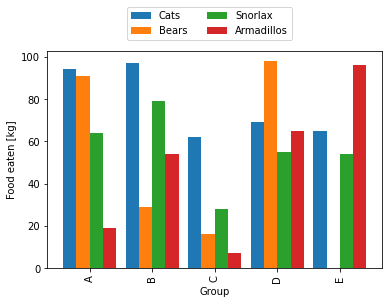

In [16]:
fig_clustered, ax_clustered = plt.subplots()
data_clustered.set_index("Group").plot(ax = ax_clustered, kind='bar', legend = False, width = 0.85)

fig_clustered.legend(loc='upper center', ncol = 2, bbox_to_anchor=(0.5, 1.050))
ax_clustered.set_ylabel("Food eaten [kg]")

Fixing the legend, we can do the following

Code sourced from here: https://stackoverflow.com/questions/10101141/matplotlib-legend-add-items-across-columns-instead-of-down

Text(0, 0.5, 'Food eaten [kg]')

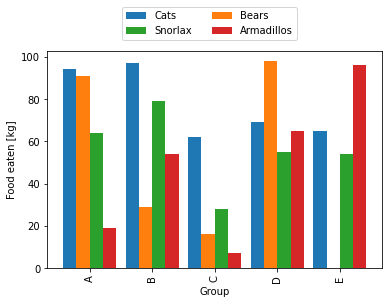

In [17]:
#import intertools. Honestly I copied this bit of code from somewhere else, see

import itertools

#create a flipping function, that will allow us to change the order of our legend.
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

fig_clustered, ax_clustered = plt.subplots()
data_clustered.set_index("Group").plot(ax = ax_clustered, kind='bar', legend = False, width = 0.85)

#okay so we're going to get our legend handles again,
handles_clustered, labels_clustered = ax_clustered.get_legend_handles_labels()

#specify what we want in the legend
n_col = 2

#Flip our legend like so, again, no idea how intertools work, don't know how this works, but it does.
fig_clustered.legend(flip(handles_clustered, n_col), flip(labels_clustered, n_col), ncol=n_col, loc='upper center', bbox_to_anchor=(0.5, 1.050))
ax_clustered.set_ylabel("Food eaten [kg]")

Here's that with a gradient color scale.

Text(0, 0.5, 'Food eaten [kg]')

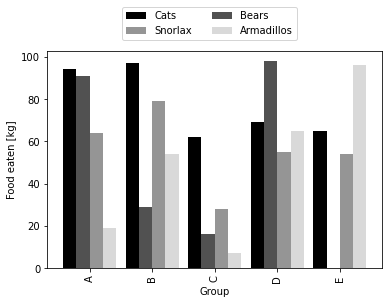

In [18]:
cmap = plt.get_cmap('Greys')
color_ind = np.linspace(0,1,len(Group))
color_ind = np.flip(color_ind)
colors = list()

for i in np.arange(len(Group)):
    colors.append(cmap(color_ind[i]))
    
fig_clustered, ax_clustered = plt.subplots()
data_clustered.set_index("Group").plot(ax = ax_clustered, kind='bar', legend = False, width = 0.85, color =colors)

#okay so we're going to get our legend handles again,
handles_clustered, labels_clustered = ax_clustered.get_legend_handles_labels()

#specify what we want in the legend
n_col = 2

#Flip our legend like so, again, no idea how intertools work, don't know how this works, but it does.
fig_clustered.legend(flip(handles_clustered, n_col), flip(labels_clustered, n_col), ncol=n_col, loc='upper center', bbox_to_anchor=(0.5, 1.050))
ax_clustered.set_ylabel("Food eaten [kg]")

## Adding a Linebreak

Adding a linebreak is fairly simple. Imagine our cats eat a lot more than the rest of our animals for some reason.

Text(0.02, 0.5, 'Food Eaten [kg]')

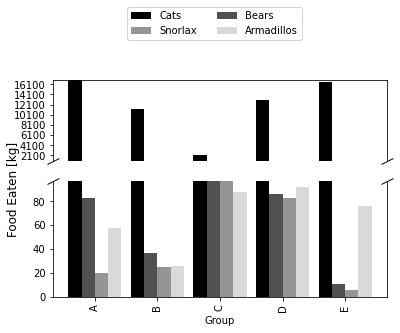

In [19]:
#The data structure will need to be structured a little differently. For a clustered barchart, we want three things

#1) We want the bars themselves, previously, this has been animals, so let's pull those up again
Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 

#2)When we make our titles, we will need to have an "index", that will be the basis for our grouping.
Group = ["A", "B", "C", "D", "E"]

#3) Then we want the actual data, so I'll make another random array

data_linebreak = pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals)
data_linebreak['Group'] = Group
data_linebreak['Cats']= data_linebreak['Cats']*200

fig_linebreak, (ax_upper, ax_lower) =  plt.subplots(2, 1, gridspec_kw={'height_ratios':  [1.4, 2]}, sharex=True)

#Here, we set up the visuals for the graph
ax_upper.spines['bottom'].set_visible(False)
ax_lower.spines['top'].set_visible(False)
ax_upper.tick_params(bottom =False)  # don't put tick labels at the top

#What I'm doing here is finding the second maximum in the entire dataframe to automate setting my axis. 
#There are a variety of ways to automate setting your axis, unfortunately this will occur on a case by case basis
max_upper =data_linebreak[data_linebreak.columns[0:-1]].max().max()
max_lower = data_linebreak[data_linebreak.columns[1:-1]].max().max()
ax_upper.yaxis.set_ticks(np.arange(100, max_upper, 2000))
ax_upper.set_ylim(1000, max_upper)  # outliers only
ax_lower.set_ylim(0, max_lower)

#Adding in the little lines for the line break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_upper.plot([0, 1], [0, 0], transform=ax_upper.transAxes, **kwargs)

ax_lower.plot([0, 1], [1, 1], transform=ax_lower.transAxes, **kwargs)

#We plot the same data twice
data_linebreak.set_index("Group").plot(ax = ax_upper, kind='bar', legend = False, width = 0.85, color = colors)
data_linebreak.set_index("Group").plot(ax = ax_lower, kind='bar', legend= False, width = 0.85, color = colors)

#okay so we're going to get our legend handles again,
handles_linebreak, labels_linebreak = ax_upper.get_legend_handles_labels()

#specify what we want in the legend
n_col = 2

#Flip our legend like so, again, no idea how intertools work, don't know how this works, but it does.
fig_linebreak.legend(flip(handles_linebreak, n_col), flip(labels_linebreak, n_col), ncol=n_col, loc='upper center', bbox_to_anchor=(0.5, 1.15))

#And this is a great place to bring back in our title for the y-axis
fig_linebreak.supylabel('Food Eaten [kg]')

## THE CLUSTERED STACKED BAR CHART

This is basically the culmination of my thesis, so here we go.

This section of the code was originally based on, but I've added my own tweaks: https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars

In [20]:
# remember how I said that you might want to read an excel workbook.
# Basically you can set up nice df, that's the same between workbooks and then iterate between them
# I think this creates a dataframe of dataframes
# Anyway, you can also split the data out into multiple portions (great if you want to add error bars)

#many_dataframes = pd.read_excel("many_dataframes.xlsx", sheet_name= None, header= 0)
# data = []
# error = []
#for key in many_dataframes.keys():
#     total.append(many_dataframes[key]['Data'].tolist())
#     upper.append(many_dataframes[key]['Error'].tolist())

#However, I will demonstrate this code using fabricated dataframes, because I want this tutorial to be self contained

([<matplotlib.axis.XTick at 0x1e06fbfb940>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

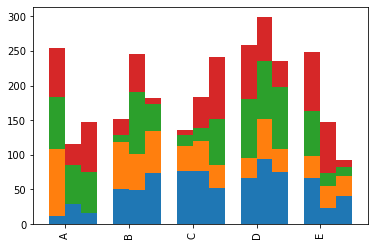

In [21]:
#Generating data: Alright basically I'm just going to do this for three dataframes

#1) We want the bars themselves, previously, this has been animals, so let's pull those up again
Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 

#2)When we make our titles, we will need to have an "index", that will be the basis for our grouping.
Group = ["A", "B", "C", "D", "E"]

#3) Then we want the actual data, so I'll make another random array

data_1 = pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals)
data_1['Group'] = Group
data_2 = pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals)
data_2['Group'] = Group
data_3 = pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals)
data_3['Group'] = Group

data_net = [data_1, data_2, data_3]

Fig_stacked_clustered, ax_stacked_clustered = plt.subplots()

for data_set in data_net: # for each data frame
    Fig_stacked_clustered = data_set.plot(kind="bar", linewidth=0, stacked=True, ax=ax_stacked_clustered, legend=False, grid=False)

#If you plot the above code, all of the graphs will be stacked on top of each other. 
#We use this for loop to shift them.

h,l = Fig_stacked_clustered.get_legend_handles_labels() 
n_df =len(data_net)
n_col = len(Animals)
for i in range(0, n_df * n_col, n_col):
    for pa in h[i:i+n_col]:
        for rect in pa.patches: # for each index
            rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
            rect.set_width(1 / float(n_df + 1))
#We use this to expand the boundaries of the graph to add some space at the end
plt.xlim(np.array(plt.xlim())+[0,1 / float(n_df + 1)])

#We use this to change the label on the ticks
plt.xticks(np.arange(len(Group)), Group,  color='black')

## Adding two legends

Perhaps this is a little underwelming. It's not very attactive right? I just wanted to give you the bare bones that you needed to create such a thing. The graphs are splotchy, and we can't really tell them apart. So, we're going to add hatching and two legends

We add two legends by creating a phantom bar chart behind the first bar chart that could theoretically have it's own legend

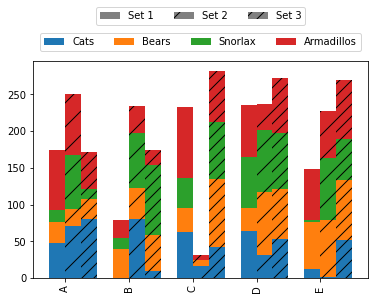

In [22]:
#Generating data: Alright basically I'm just going to do this for three dataframes

Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 
Group = ["A", "B", "C", "D", "E"]

Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 
Group = ["A", "B", "C", "D", "E"]
data_net = []
for number in np.arange(3):
    data_net.append(pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals))

data_titles = ["Set 1", "Set 2", "Set 3"]

n_df =len(data_net)
n_col = len(Animals)

Fig_stacked_clustered = plt.subplot()

for data_set in data_net: # for each data frame
    Fig_stacked_clustered = data_set.plot(kind="bar", linewidth=0, stacked=True, ax=Fig_stacked_clustered, legend=False, grid=False)

    
#New Line!!: we are now setting a hatch
h,l = Fig_stacked_clustered.get_legend_handles_labels() 

hatch_array = []

for i in range(0, n_df * n_col, n_col):
    for pa in h[i:i+n_col]:
        for rect in pa.patches: # for each index
            rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
            rect.set_width(1 / float(n_df + 1))
            rect.set_hatch("/"* int(i / n_col)) #New Line!
    hatch_array.append("/"* int(i / n_col))

#creating an invisible bar chart behind the first one
legend_1 = []
for i in range(n_df):
    legend_1.append(Fig_stacked_clustered.bar(i, 0, color ='grey', hatch =hatch_array[i] ))
   
plt.xlim(np.array(plt.xlim())+[0,1 / float(n_df + 1)])
plt.xticks(np.arange(len(Group)), Group,  color='black')

#We make one legend based off of the data in the invisible chart
legend = Fig_stacked_clustered.legend(legend_1, data_titles, loc = "upper center", ncol = 3,bbox_to_anchor=(0.5, 1.27))

#Add that legend to the plot
ax = plt.gca().add_artist(legend)

#Add a second legend based on the data in the original plot
plt.legend(h[:n_col],l[:n_col], loc="upper center", ncol =4,bbox_to_anchor=(0.5, 1.15))


## THE CLUSTERED STACKED BAR CHART WITH ERROR BARS

This is actually the reason I started this all, is I wanted to have error bars on a stacked clustered bar chart, and why I needed to embelish on the previous stack overflow link. Plus I wanted to have a gradient of colors instead of hatching. Here, we'll put everything all together!

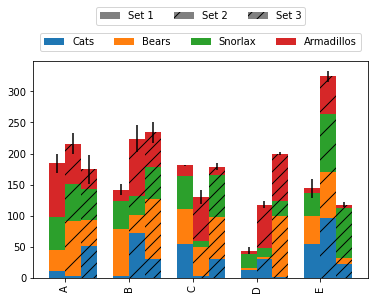

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 
Group = ["A", "B", "C", "D", "E"]
data_net = []
error_net = []
total_net = []
data_titles = ["Set 1", "Set 2", "Set 3"]

for number in np.arange(len(data_titles)):
    data_net.append(pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals))
    error_net.append(np.random.rand(len(Group))*25)
    total_net.append(data_net[number].sum(axis=1))


n_df =len(data_net)
n_col = len(Animals)

Fig_stacked_clustered = plt.subplot()

for value, data_set in enumerate(data_net): # for each data frame
    Fig_stacked_clustered = data_set.plot(kind="bar", linewidth=0, stacked=True, ax=Fig_stacked_clustered, legend=False, grid=False)
    #Okay, what is happening here? we need to offset the errors by the same amount as the bar is getting moved later
    #So actually, we're moving the error bars first, then expecting the bars to show up there later
    #I can't exactly remember how I cam up with this formula
    Fig_stacked_clustered.errorbar(data_net[value].index +  Fig_stacked_clustered.patches[0].get_x()+(0.5+value)*1 / float(n_df + 1),total_net[value], yerr = (error_net[value],error_net[value]), color="black", ls='none')

#New Line!!: we are now setting a hatch
h,l = Fig_stacked_clustered.get_legend_handles_labels() 

hatch_array = []

for i in range(0, n_df * n_col, n_col):
    for pa in h[i:i+n_col]:
        for rect in pa.patches: # for each index
            rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
            rect.set_width(1 / float(n_df + 1))
            rect.set_hatch("/"* int(i / n_col)) #New Line!
    hatch_array.append("/"* int(i / n_col))

#creating an invisible bar chart behind the first one
legend_1 = []
for i in range(n_df):
    legend_1.append(Fig_stacked_clustered.bar(i, 0, color ='grey', hatch =hatch_array[i] ))
   
plt.xlim(np.array(plt.xlim())+[0,1 / float(n_df + 1)])
plt.xticks(np.arange(len(Group)), Group,  color='black')

#We make one legend based off of the data in the invisible chart
legend = Fig_stacked_clustered.legend(legend_1, data_titles, loc = "upper center", ncol = 3,bbox_to_anchor=(0.5, 1.27))

#Add that legend to the plot
ax = plt.gca().add_artist(legend)

#Add a second legend based on the data in the original plot
plt.legend(h[:n_col],l[:n_col], loc="upper center", ncol =4,bbox_to_anchor=(0.5, 1.15))

## The Stacked-Clustered Bar Chart with errors and also gradient coloring

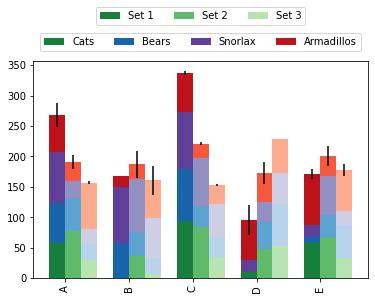

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Animals = ["Cats", "Bears", "Snorlax", "Armadillos"] 
#We need as many colors as there are animals
key = ['Greens', 'Blues', 'Purples',  'Reds']

Group = ["A", "B", "C", "D", "E"]
data_net = []
error_net = []
total_net = []
data_titles = ["Set 1", "Set 2", "Set 3"]

data_set_number =len(data_titles)

for number in np.arange(data_set_number):
    data_net.append(pd.DataFrame(np.random.randint(0,100,size=(len(Group), len(Animals))), columns=Animals))
    error_net.append(np.random.rand(len(Group))*25)
    total_net.append(data_net[number].sum(axis=1))


color_ind = np.linspace(0.3,0.8,data_set_number)
color_ind = np.flip(color_ind)

legend_map2= plt.get_cmap('Greens')
second_legend = list()
for i in np.arange(data_set_number):
    second_legend.append(legend_map2(color_ind[i]))
# batteries = ['Electrolyte Var.' ,'Cat. & Binder Var.', 'Carbon/binder-less', 'Anode Protection', 'Gold Cat.']
# legend_zip2 = dict(zip(batteries,second_legend))
colorseed = [ [] for _ in range(data_set_number) ]

for i in np.arange(data_set_number):
    for number, color in enumerate(key):
        cmap = plt.get_cmap(color)
        colorseed[i].append(cmap(color_ind[i]))
    
n_df =len(data_net)
n_col = len(Animals)

Fig_stacked_clustered = plt.subplot()

for value, data_set in enumerate(data_net): # for each data frame
    Fig_stacked_clustered = data_set.plot(kind="bar", linewidth=0, stacked=True, ax=Fig_stacked_clustered, legend=False, grid=False, color=colorseed[value])
    #Okay, what is happening here? we need to offset the errors by the same amount as the bar is getting moved later
    #So actually, we're moving the error bars first, then expecting the bars to show up there later
    #I can't exactly remember how I cam up with this formula
    Fig_stacked_clustered.errorbar(data_net[value].index +  Fig_stacked_clustered.patches[0].get_x()+(0.5+value)*1 / float(n_df + 1),total_net[value], yerr = (error_net[value],error_net[value]), color="black", ls='none')

#New Line!!: we are now setting a hatch
h,l = Fig_stacked_clustered.get_legend_handles_labels() 


for i in range(0, n_df * n_col, n_col):
    for pa in h[i:i+n_col]:
        for rect in pa.patches: # for each index
            rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
            rect.set_width(1 / float(n_df + 1))

#creating an invisible bar chart behind the first one
legend_1 = []
for i in range(n_df):
    legend_1.append(Fig_stacked_clustered.bar(i, 0, color =second_legend[i]))
   
plt.xlim(np.array(plt.xlim())+[0,1 / float(n_df + 1)])
plt.xticks(np.arange(len(Group)), Group,  color='black')

#We make one legend based off of the data in the invisible chart
legend = Fig_stacked_clustered.legend(legend_1, data_titles, loc = "upper center", ncol = 3,bbox_to_anchor=(0.5, 1.27))

#Add that legend to the plot
ax = plt.gca().add_artist(legend)

#Add a second legend based on the data in the original plot
plt.legend(h[:n_col],l[:n_col], loc="upper center", ncol =4,bbox_to_anchor=(0.5, 1.15))